## Investigate top-paying roles and skills in the data science industry

## Questions to Answer:

What are the most demanded skills for the top 3 most popular data roles?

How are in-demand skills trending for Data Analysts?

How well do jobs and skills pay for Data Analysts?

What is the most optimal skill to learn for Data Analysts?

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

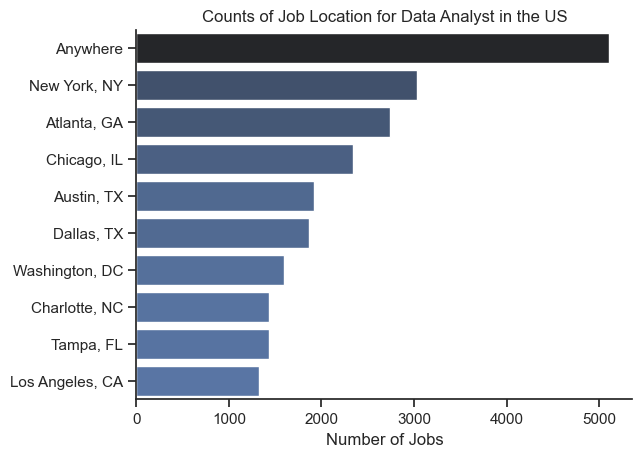

In [18]:
# Filter for US Data Analyst Roles
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]
# Top Job Location
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Location for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

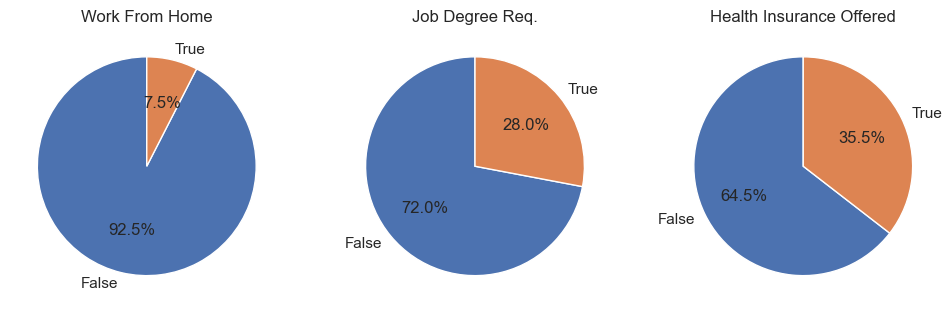

In [ ]:
#Job Requirements and Offerings
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

dict_column = {
    'job_work_from_home':'Work From Home',
    'job_no_degree_mention':'Job Degree Req.',
    'job_health_insurance':'Health Insurance Offered'
}
for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(),startangle=90,autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

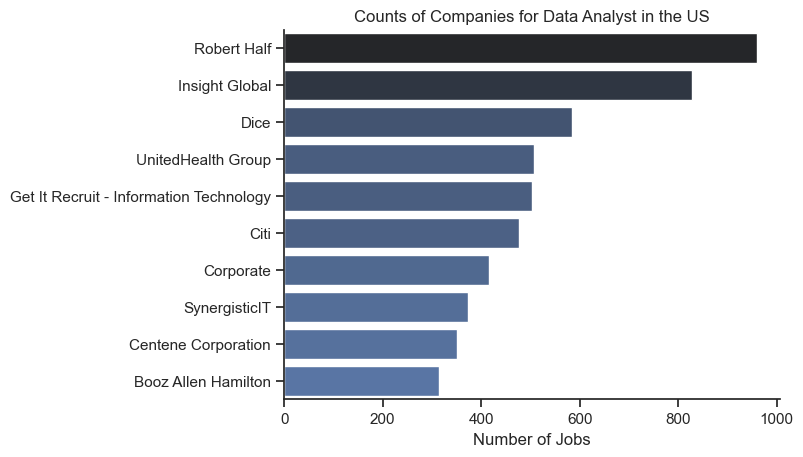

In [ ]:
# Companies to Explore
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()